In [1]:
options(warn=-1)
if(!require(psych)){ install.packages("psych")}
if(!require(FSA)){ install.packages("FSA")}
if(!require(lattice)){ install.packages("lattice")}
if(!require(lsr)){ install.packages("lsr")}
if(!require(rcompanion)){ install.packages("rcompanion")}
if(!require(ggplot2)){ install.packages("ggplot2")}
if(!require(lattice)){ install.packages("tidyr")}
if(!require(lattice)){ install.packages("stringr")}

Loading required package: psych

Loading required package: FSA

## FSA v0.9.1. See citation('FSA') if used in publication.
## Run fishR() for related website and fishR('IFAR') for related book.


Attaching package: 'FSA'


The following object is masked from 'package:psych':

    headtail


Loading required package: lattice

Loading required package: lsr

Loading required package: rcompanion


Attaching package: 'rcompanion'


The following object is masked from 'package:psych':

    phi


Loading required package: ggplot2

Registered S3 methods overwritten by 'tibble':
  method     from  
  format.tbl pillar
  print.tbl  pillar

Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang


Attaching package: 'ggplot2'


The following objects are masked from 'package:psych':

    %+%, alpha




In [2]:
library(rcompanion)
library(psych)
library(dplyr)
library(base)
library(ggplot2)
library(tidyr)
library(stringr)
library(car)


Attaching package: 'dplyr'


The following objects are masked from 'package:stats':

    filter, lag


The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union


Loading required package: carData

Registered S3 methods overwritten by 'car':
  method       from
  hist.boot    FSA 
  confint.boot FSA 


Attaching package: 'car'


The following object is masked from 'package:dplyr':

    recode


The following object is masked from 'package:FSA':

    bootCase


The following object is masked from 'package:psych':

    logit




## Proc #2 

In [3]:
line <- readLines("Datos_tarea_2.txt")
Tiempo<-line[which(grepl("user", line, fixed = TRUE))]
params<-line[which(grepl(".sc", line, fixed = TRUE))]

In [4]:
rm("line")

In [5]:
Data_raw <- data.frame(params, Tiempo)

In [6]:
#https://www.tutorialspoint.com/how-to-remove-a-character-in-an-r-data-frame-column
Data_raw$Tiempo <-gsub("user ","",as.character(Data_raw$Tiempo))
Data_raw$Tiempo <-gsub(",",".",as.character(Data_raw$Tiempo))
Data_raw$params <-gsub("APU","_APU_",as.character(Data_raw$params))
Data_raw$params <-gsub("GPU","_GPU_",as.character(Data_raw$params))
Data_raw$params <-gsub("CPU","_CPU_",as.character(Data_raw$params))
Data_raw$params <-gsub("-","_",as.character(Data_raw$params))
Data_raw$params <-gsub(".sc","",as.character(Data_raw$params))

head(Data_raw)

,params,Tiempo
,<chr>,<chr>
1,10167_16000_APU_010_1280x720,50.25
2,10184_1000_APU_011_1440x900,30.90
3,10204_1000_APU_101_1280x720,46.22
4,10210_16000_APU_110_1440x900,171.67
5,10216_4000_APU_001_1280x720,33.40
6,10368_260000_APU_001_1280x720,147.53


In [7]:
Data_proc <- Data_raw %>% separate(params, c(NA,"Objetos","Arquitectura", "Efectos", "Tamaño"), "_")
head(Data_proc)

,Objetos,Arquitectura,Efectos,Tamaño,Tiempo
,<chr>,<chr>,<chr>,<chr>,<chr>
1,16000,APU,010,1280x720,50.25
2,1000,APU,011,1440x900,30.90
3,1000,APU,101,1280x720,46.22
4,16000,APU,110,1440x900,171.67
5,4000,APU,001,1280x720,33.40
6,260000,APU,001,1280x720,147.53


In [8]:
#https://cran.r-project.org/web/packages/hablar/vignettes/convert.html
Data_proc$Tiempo <- as.double(Data_proc$Tiempo)
Data_proc$Objetos <- as.integer(Data_proc$Objetos)
Data_proc$Objetos = factor(Data_proc$Objetos, levels=unique(Data_proc$Objetos))
Data_proc$Tamaño = factor(Data_proc$Tamaño, levels=unique(Data_proc$Tamaño))
head(Data_proc)
str(Data_proc)
summary(Data_proc)

,Objetos,Arquitectura,Efectos,Tamaño,Tiempo
,<fct>,<chr>,<chr>,<fct>,<dbl>
1,16000,APU,010,1280x720,50.25
2,1000,APU,011,1440x900,30.90
3,1000,APU,101,1280x720,46.22
4,16000,APU,110,1440x900,171.67
5,4000,APU,001,1280x720,33.40
6,260000,APU,001,1280x720,147.53


'data.frame':	1800 obs. of  5 variables:
 $ Objetos     : Factor w/ 5 levels "16000","1000",..: 1 2 2 1 3 4 4 5 2 3 ...
 $ Arquitectura: chr  "APU" "APU" "APU" "APU" ...
 $ Efectos     : chr  "010" "011" "101" "110" ...
 $ Tamaño      : Factor w/ 3 levels "1280x720","1440x900",..: 1 2 1 2 1 1 2 1 2 3 ...
 $ Tiempo      : num  50.2 30.9 46.2 171.7 33.4 ...


   Objetos    Arquitectura         Efectos                Tamaño   
 16000 :360   Length:1800        Length:1800        1280x720 :600  
 1000  :360   Class :character   Class :character   1440x900 :600  
 4000  :360   Mode  :character   Mode  :character   1920x1080:600  
 260000:360                                                        
 65000 :360                                                        
                                                                   
     Tiempo       
 Min.   :   0.47  
 1st Qu.:  32.20  
 Median :  91.87  
 Mean   : 396.96  
 3rd Qu.: 342.26  
 Max.   :7588.69  

In [9]:
Summarize(Tiempo ~ Arquitectura*Efectos, data=Data_proc, digits=4)

Arquitectura,Efectos,n,mean,sd,min,Q1,median,Q3,max
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
APU,000,75,48.8199,25.8458,22.15,30.980,37.61,55.795,109.90
CPU,000,75,200.8027,187.0071,36.10,58.190,119.24,271.615,652.17
GPU,000,75,8.6764,11.4868,0.47,1.100,2.81,9.040,34.96
APU,001,75,77.4107,57.6023,23.56,34.205,55.79,103.525,216.40
CPU,001,75,267.5824,254.1440,38.75,68.435,169.75,385.955,875.82
GPU,001,75,17.1929,21.7500,0.60,1.910,7.20,21.850,68.15
APU,010,75,68.9101,42.6068,25.63,35.465,56.13,88.675,168.91
CPU,010,75,289.8768,262.2417,43.06,80.865,202.69,410.945,913.51
GPU,010,75,14.9692,18.2820,0.70,2.060,6.60,17.875,56.69


In [10]:
Summarize(Tiempo ~ Arquitectura*Tamaño, data=Data_proc, digits=4)

Arquitectura,Tamaño,n,mean,sd,min,Q1,median,Q3,max
<chr>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
APU,1280x720,200,175.1695,269.9909,22.15,43.7825,78.020,151.7975,1554.30
CPU,1280x720,200,705.7019,985.3063,36.10,148.3150,316.430,795.1450,4808.51
GPU,1280x720,200,49.5922,97.7249,0.47,3.1300,13.015,44.1400,547.68
APU,1440x900,200,216.8042,346.5716,26.24,50.6975,89.975,189.3500,1996.02
CPU,1440x900,200,910.1813,1256.7136,46.22,193.7575,423.250,1027.8500,6160.55
GPU,1440x900,200,61.5909,122.1324,0.51,3.6900,14.520,52.0950,688.60
APU,1920x1080,200,260.8482,426.5577,26.80,55.1875,105.455,233.0900,2437.39
CPU,1920x1080,200,1120.1836,1540.6345,56.81,239.6775,527.385,1274.1375,7588.69
GPU,1920x1080,200,72.5345,145.9630,0.68,4.0200,16.805,62.9325,824.22


In [11]:
Summarize(Tiempo ~ Arquitectura*Objetos, data=Data_proc, digits=4)

Arquitectura,Objetos,n,mean,sd,min,Q1,median,Q3,max
<chr>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
APU,16000,120,143.6490,127.0058,34.39,56.0450,95.825,183.4175,521.32
CPU,16000,120,600.9662,494.9332,88.93,193.7575,409.390,890.0100,1869.83
GPU,16000,120,25.2894,26.8955,2.16,6.9225,14.885,33.2275,104.59
APU,1000,120,40.7383,14.5340,22.15,27.8400,34.965,53.3925,70.88
CPU,1000,120,155.7912,110.1541,36.10,52.6175,124.725,253.3375,345.05
GPU,1000,120,2.2397,1.5320,0.47,0.8600,1.695,3.5700,5.37
APU,4000,120,71.3999,42.9259,29.34,38.0075,54.440,95.2200,191.74
CPU,4000,120,299.7444,222.2753,57.86,96.9225,221.765,486.4425,766.32
GPU,4000,120,7.4899,6.4559,1.06,2.3675,4.800,11.2425,28.48


In [12]:
Summarize(Tiempo ~ Tamaño*Objetos, data=Data_proc, digits=4)

Tamaño,Objetos,n,mean,sd,min,Q1,median,Q3,max
<fct>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1280x720,16000,120,197.8449,287.4095,2.16,26.8700,78.510,176.7850,1188.33
1440x900,16000,120,257.5177,379.2504,2.67,34.4425,97.435,229.5850,1559.73
1920x1080,16000,120,314.5419,463.5883,3.14,39.9925,111.985,279.7500,1869.83
1280x720,1000,120,54.1805,71.0136,0.47,3.1300,31.870,49.4950,232.66
1440x900,1000,120,66.2853,89.5543,0.51,3.6900,37.170,55.4150,288.09
1920x1080,1000,120,78.3033,108.9232,0.68,4.0200,39.525,65.8775,345.05
1280x720,4000,120,98.8227,134.4504,1.06,9.3775,47.680,88.0250,486.57
1440x900,4000,120,126.7863,178.2801,1.27,11.2175,55.215,111.0950,637.11
1920x1080,4000,120,153.0252,218.0771,1.49,12.7200,62.675,134.2125,766.32


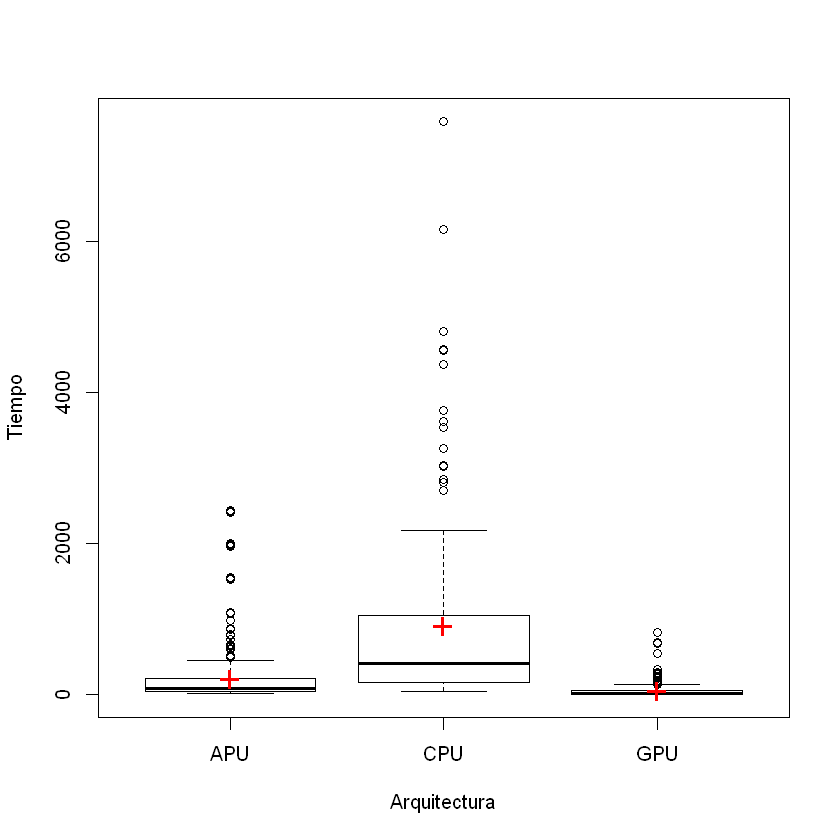

In [13]:
M = tapply(Data_proc$Tiempo, INDEX=Data_proc$Arquitectura, FUN = mean)
boxplot(Tiempo ~ Arquitectura, data = Data_proc)
points(M, col="red", pch="+", cex=2)

#M = tapply(Data_proc$Tiempo, 
#           INDEX= Data_proc$Arquitectura, 
#           FUN = mean)
#boxplot(Tiempo ~ Arquitectura + Efectos, 
#        data = Data_proc)
#points(M, 
#       col="red",
#       pch="+", cex=2)

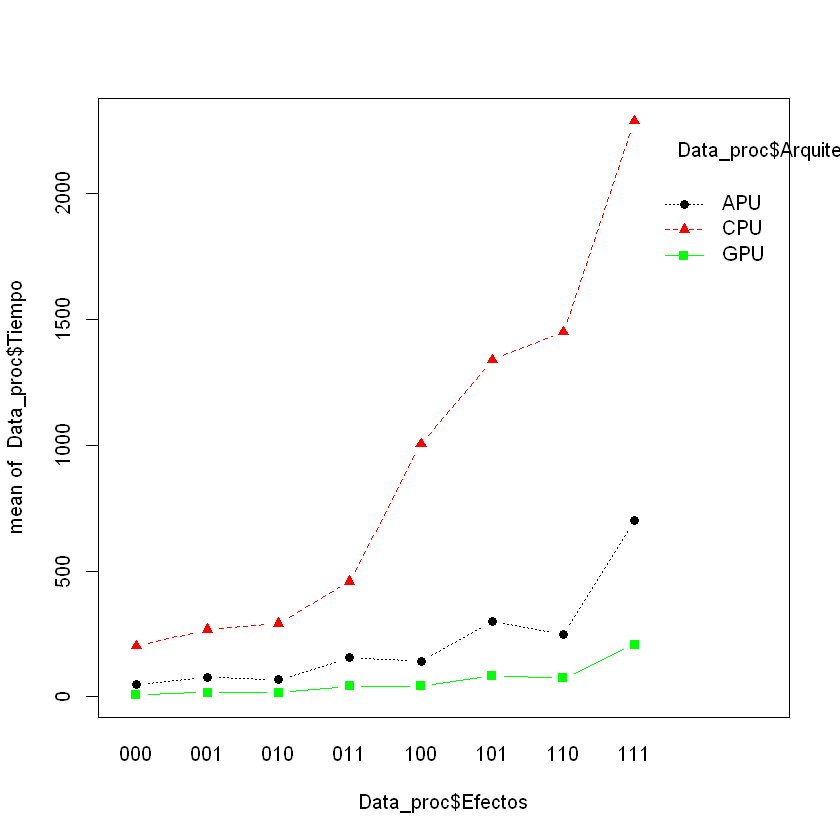

In [14]:
interaction.plot(x.factor = Data_proc$Efectos,
                 trace.factor = Data_proc$Arquitectura,
                 response = Data_proc$Tiempo,
                 fun = mean,
                 type = "b",
                 col = c("black", "red", "green"),
                 pch = c(19, 17, 15),
                 fixed = TRUE,
                 leg_bty = "o")

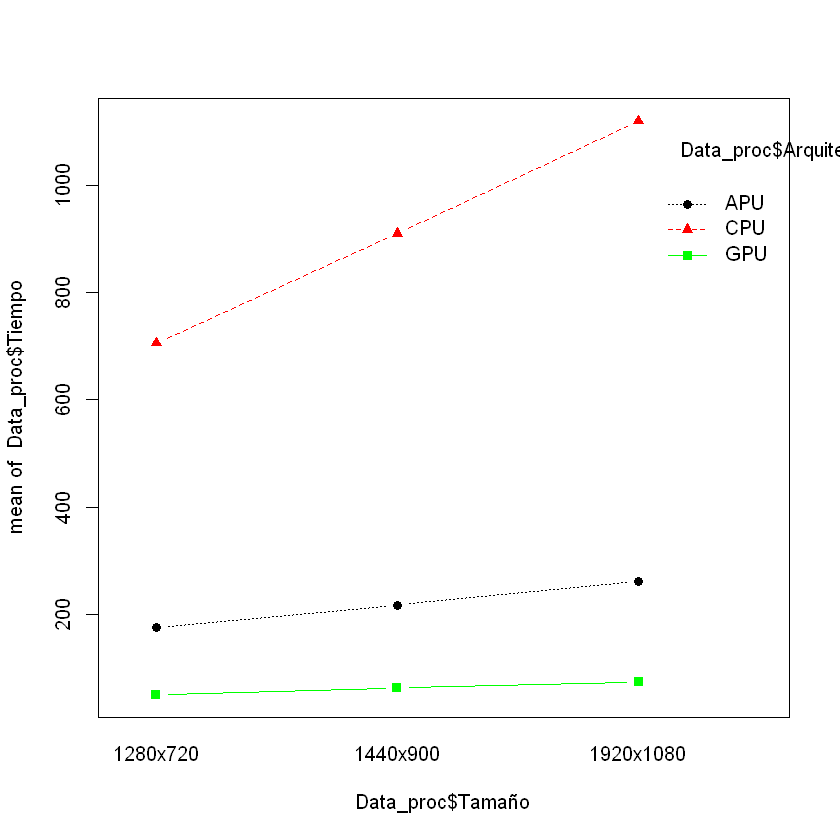

In [15]:
interaction.plot(x.factor = Data_proc$Tamaño,
                 trace.factor = Data_proc$Arquitectura,
                 response = Data_proc$Tiempo,
                 fun = mean,
                 type = "b",
                 col = c("black", "red", "green"),
                 pch = c(19, 17, 15),
                 fixed = TRUE,
                 leg_bty = "o")

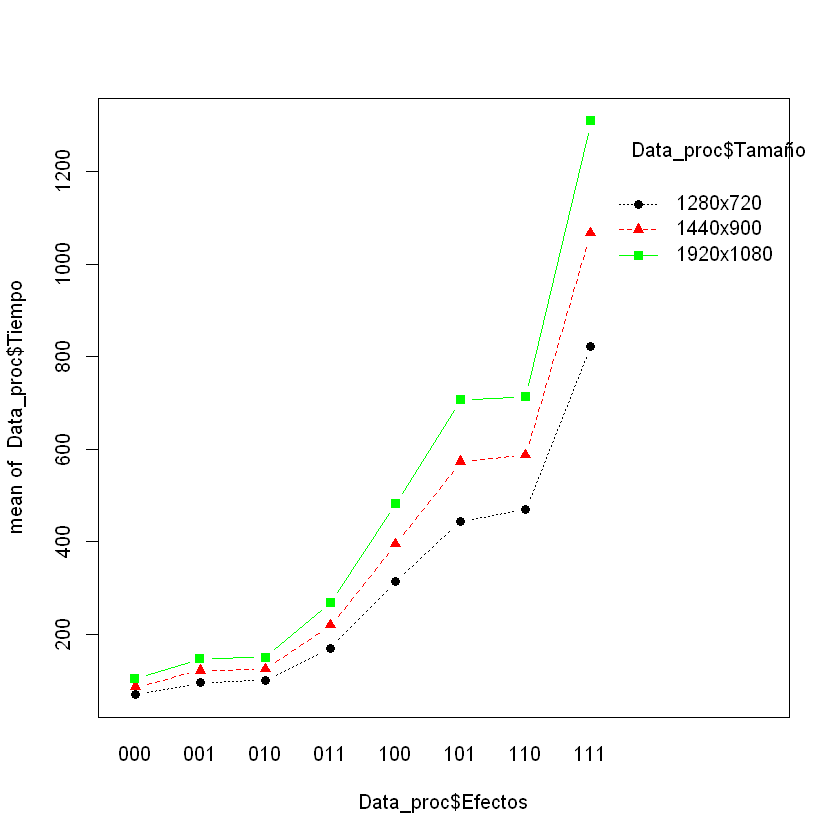

In [16]:
interaction.plot(x.factor = Data_proc$Efectos,
                 trace.factor = Data_proc$Tamaño,
                 response = Data_proc$Tiempo,
                 fun = mean,
                 type = "b",
                 col = c("black", "red", "green"),
                 pch = c(19, 17, 15),
                 fixed = TRUE,
                 leg_bty = "o")

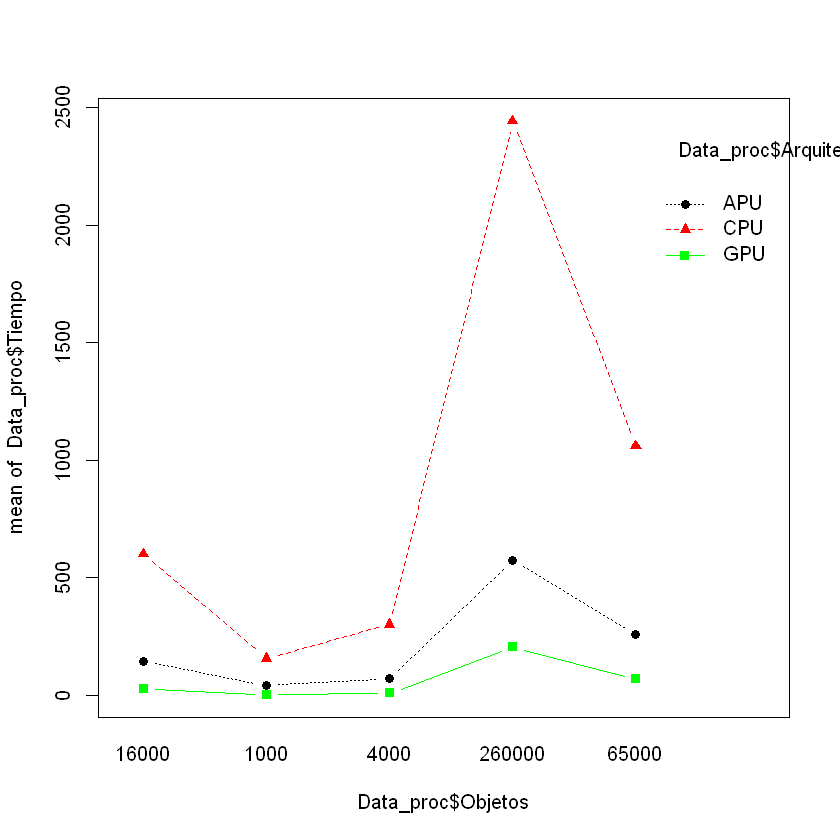

In [17]:
interaction.plot(x.factor = Data_proc$Objetos,
                 trace.factor = Data_proc$Arquitectura,
                 response = Data_proc$Tiempo,
                 fun = mean,
                 type = "b",
                 col = c("black", "red", "green"),
                 pch = c(19, 17, 15),
                 fixed = TRUE,
                 leg_bty = "o")

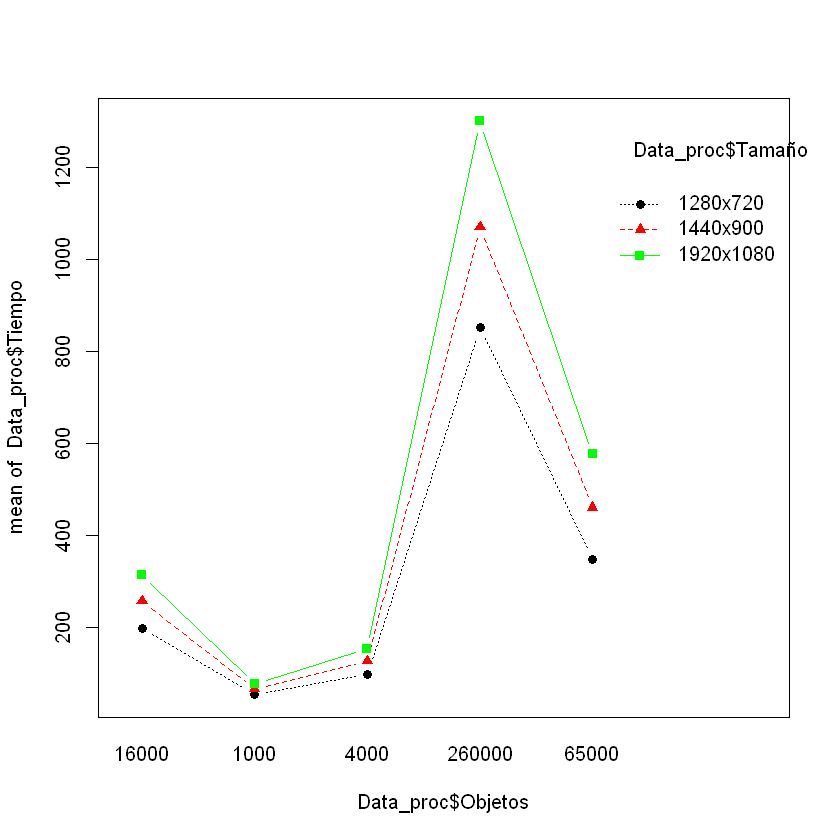

In [18]:
interaction.plot(x.factor = Data_proc$Objetos,
                 trace.factor = Data_proc$Tamaño,
                 response = Data_proc$Tiempo,
                 fun = mean,
                 type = "b",
                 col = c("black", "red", "green"),
                 pch = c(19, 17, 15),
                 fixed = TRUE,
                 leg_bty = "o")

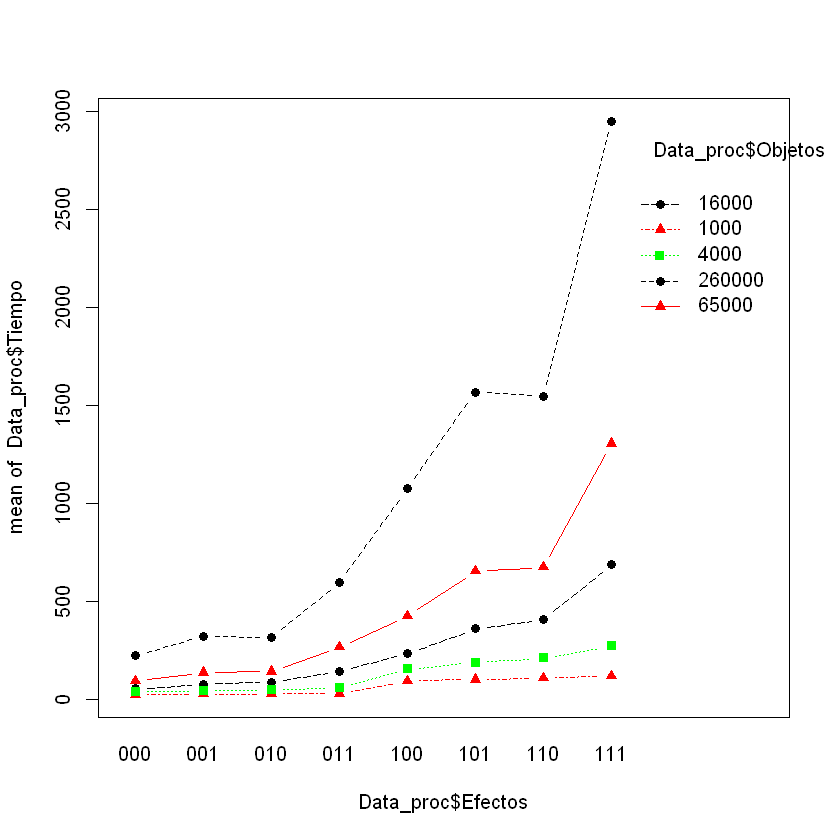

In [19]:
interaction.plot(x.factor = Data_proc$Efectos,
                 trace.factor = Data_proc$Objetos,
                 response = Data_proc$Tiempo,
                 fun = mean,
                 type = "b",
                 col = c("black", "red", "green"),
                 pch = c(19, 17, 15),
                 fixed = TRUE,
                 leg_bty = "o")

## Modelo Lineal

In [20]:
model = lm(Tiempo ~ Arquitectura*Efectos*Objetos*Tamaño, data = Data_proc)
Anova(model, type = "II")

,Sum Sq,Df,F value,Pr(>F)
,<dbl>,<dbl>,<dbl>,<dbl>
Arquitectura,2.460990e+08,2,38754226.74,0
Efectos,1.788590e+08,7,8047334.79,0
Objetos,2.394779e+08,4,18855786.88,0
Tamaño,9.121745e+06,2,1436438.93,0
Arquitectura:Efectos,1.391115e+08,14,3129494.69,0
Arquitectura:Objetos,1.955549e+08,8,7698710.09,0
Efectos:Objetos,1.656942e+08,28,1863753.49,0
Arquitectura:Tamaño,8.845734e+06,4,696487.17,0
Efectos:Tamaño,6.209094e+06,14,139681.67,0


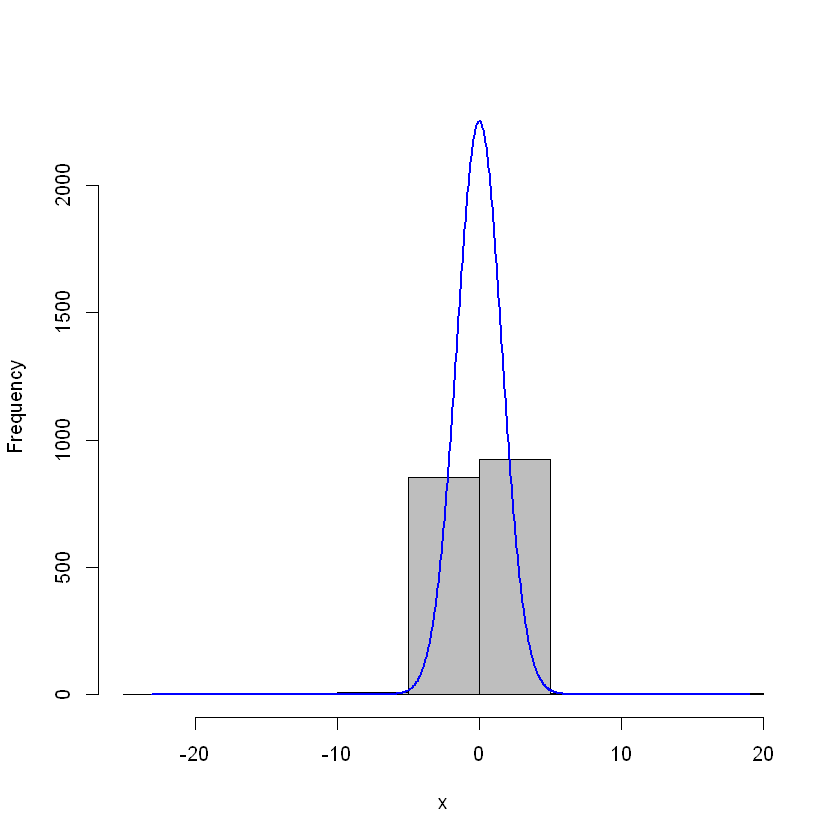

In [21]:
x=residuals(model)
plotNormalHistogram(x)

ERROR: Error in (dm - 1) %*% ff: argumentos no compatibles


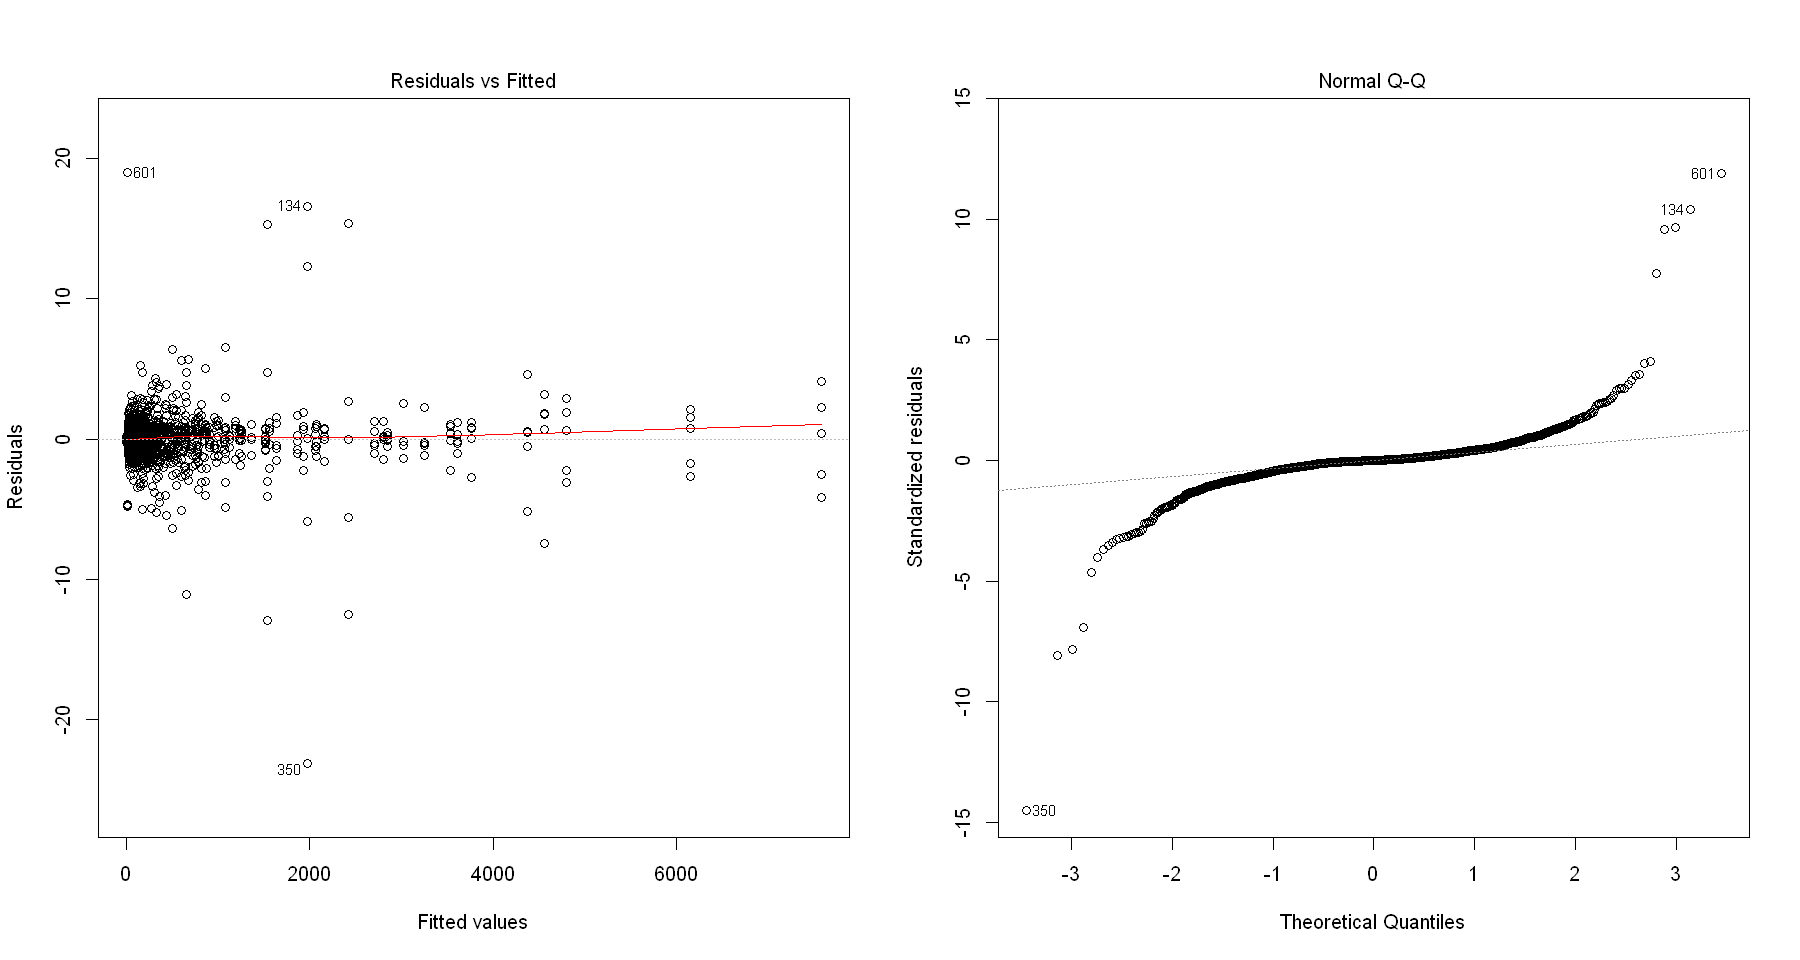

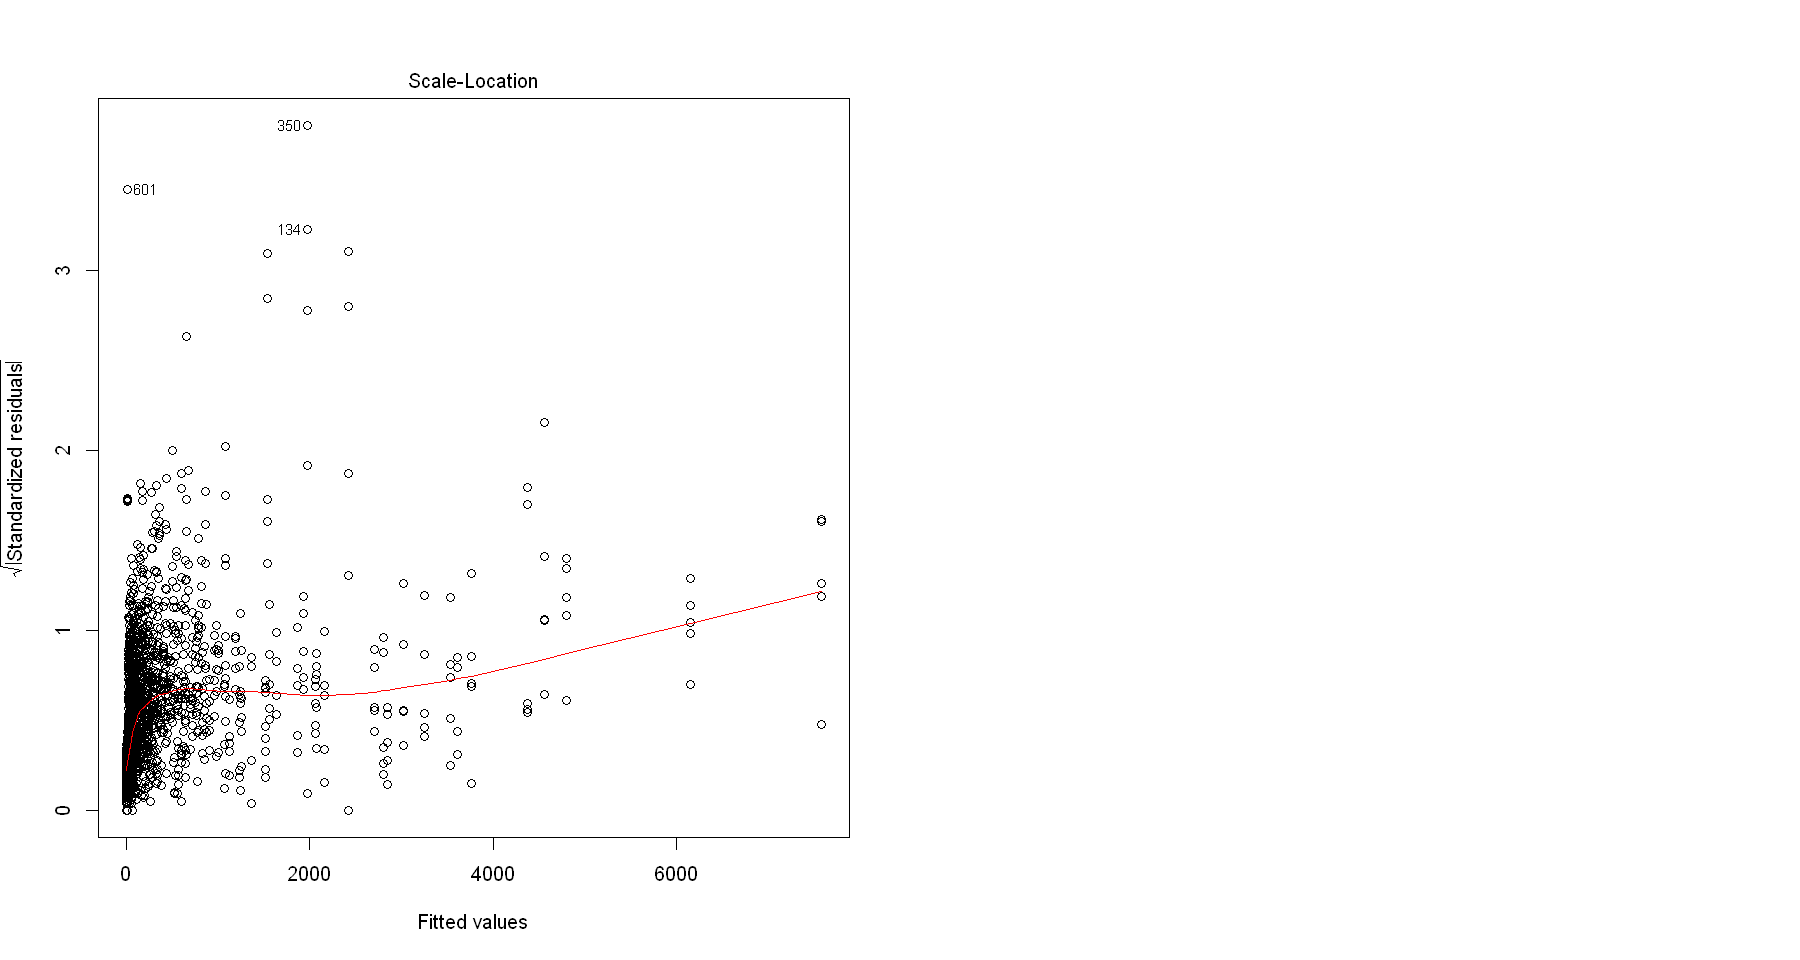

In [22]:
options(repr.plot.width=15, repr.plot.height=8)
par(mfrow=c(1,2))
plot(model)

## Transformación de datos por raíz cuadrada

In [ ]:
Tiempo_sqrt=sqrt(Data_proc$Tiempo)
model = lm(Tiempo_sqrt ~ Arquitectura*Efectos*Objetos*Tamaño, data = Data_proc)
Anova(model, type = "II")
x=residuals(model)
plotNormalHistogram(x)


In [ ]:
options(repr.plot.width=15, repr.plot.height=8)
par(mfrow=c(1,2))
plot(model)

## Transformación de datos por logaritmo

In [ ]:
Tiempo_log=log(Data_proc$Tiempo)
model = lm(Tiempo_log ~ Arquitectura*Efectos*Objetos*Tamaño, data = Data_proc)
Anova(model, type = "II")
x=residuals(model)
plotNormalHistogram(x)


In [ ]:
options(repr.plot.width=15, repr.plot.height=8)
par(mfrow=c(1,2))
plot(model)

In [ ]:
leveneTest(Tiempo_log ~ Arquitectura*Efectos*Objetos*Tamaño, data = Data_proc)

## Transformación con transformTukey

In [ ]:
options(repr.plot.width=15, repr.plot.height=8)
par(mfrow=c(1,2))
Tiempo_tukg=transformTukey(Data_proc$Tiempo)
model = lm(Tiempo_tukg ~ Arquitectura*Efectos*Objetos*Tamaño, data = Data_proc)
Anova(model, type = "II")
x=residuals(model)
plotNormalHistogram(x)

## Prueba de Levene para homocedasticidad

In [ ]:
leveneTest(Tiempo_tukg ~ Arquitectura*Efectos*Objetos*Tamaño, data = Data_proc)

## Análisis de lsmeans

In [ ]:
library(emmeans)

marginal = lsmeans(model, ~ Arquitectura)
pairs(marginal, adjust = "tukey")
# CLD
library(multcomp)
CLD = cld(marginal, alpha = 0.05, Letters = letters, adjust = "tukey")
CLD

library(lsmeans)
marginal = lsmeans(model, ~ Arquitectura)
pairs(marginal, adjust = "tukey")
# CLD
library(multcomp)
CLD = cld(marginal, alpha = 0.05, Letters = letters, adjust = "tukey")
CLD

In [ ]:
library(FSA)
Sum = Summarize(Tiempo_tukg ~ Objetos + Arquitectura, data = Data_proc, digits = 3)
# Agregamos el se
Sum$se = Sum$sd / sqrt(Sum$n)
Sum$se = signif(Sum$se, digits = 3)
Sum
# Ordenamos
Sum$Objetos = factor(Sum$Objetos, levels = unique(Sum$Objetos))
# Graficamos
library(ggplot2)
pd = position_dodge(.2)
ggplot(Sum, aes(x = Objetos,
                y = mean,
                color = Arquitectura)) +
  geom_errorbar(aes(ymin = mean - se,
                    ymax = mean + se),
                    width = .2, size = 0.7, position = pd) +
  geom_point(shape = 15, size = 4, position = pd) +
  theme_bw() + 
  theme(axis.title = element_text(face = "bold")) +
  scale_colour_manual(values = c("black", "red", "green")) +
                        ylab("Tiempo convertido usando Tukey Ladder of Powers")

## Diagramas de cajas

In [ ]:
M = tapply(Tiempo_tukg, 
           INDEX= Data_proc$Arquitectura, 
           FUN = mean)
boxplot(Tiempo_tukg ~ Arquitectura, 
        data = Data_proc)
points(M, 
       col="red",
       pch="+", cex=1)

In [ ]:
options(repr.plot.width=25, repr.plot.height=12)
par(mfrow=c(1,1))

M = tapply(Tiempo_tukg, 
           INDEX= Data_proc$Arquitectura, 
           FUN = mean)
boxplot(Tiempo_tukg ~ Arquitectura + Efectos, 
        data = Data_proc)
points(M, 
       col="red",
       pch="+", cex=1)

In [ ]:
M = tapply(Tiempo_tukg, 
           INDEX= Data_proc$Arquitectura, 
           FUN = mean)
boxplot(Tiempo_tukg ~ Arquitectura + Tamaño, 
        data = Data_proc)
points(M, 
       col="red",
       pch="+", cex=1)

In [ ]:
M = tapply(Tiempo_tukg, 
           INDEX= Data_proc$Arquitectura, 
           FUN = mean)
boxplot(Tiempo_tukg ~ Arquitectura+Objetos, 
        data = Data_proc)
points(M, 
       col="red",
       pch="+", cex=1)

## Paso 7

In [ ]:
leveneTest(Tiempo_tukg ~ Arquitectura, data = Data_proc)
leveneTest(Tiempo_tukg ~ Efectos, data = Data_proc)
leveneTest(Tiempo_tukg ~ Tamaño, data = Data_proc)
leveneTest(Tiempo_tukg ~ Objetos, data = Data_proc)

model_p7 = lm(Tiempo_tukg ~ Tamaño, data = Data_proc)
library(car)
Anova(model_p7, type = "II")
library(multcompView)
marginal = lsmeans(model_p7, ~ Tamaño)
pairs(marginal, adjust="tukey")

model_p7_2 = lm(Tiempo_tukg ~ Objetos, data = Data_proc)
library(car)
Anova(model_p7_2, type = "II")
library(multcompView)
marginal = lsmeans(model_p7_2, ~ Objetos)
pairs(marginal, adjust="tukey")

In [ ]:
library(lsmeans)
marginal = lsmeans(model_p7, ~ Tamaño)
pairs(marginal, adjust = "tukey")
# CLD
library(multcomp)
CLD = cld(marginal, alpha = 0.05, Letters = letters, adjust = "tukey")
CLD


In [ ]:
M = tapply(Tiempo_tukg, 
           INDEX= Data_proc$Arquitectura, 
           FUN = mean)
boxplot(Tiempo_tukg ~ Arquitectura, 
        data = Data_proc)
points(M, 
       col="red",
       pch="+", cex=1)

## Métricas propias

In [ ]:
## Objetos/Tiempo CPU

Data_proc$Tiempo_Objetos =  (as.double(Data_proc$Objetos))/(Data_proc$Tiempo)
head(Data_proc)